In [1]:
import pandas as pd
import numpy as np 
#make sure to install sklearn in your terminal first!
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [6]:
college_completion_data = pd.read_csv('../data/archive/cc_institution_details.csv')

In [4]:
url = "https://raw.githubusercontent.com/DG1606/CMS-R-2020/master/Placement_Data_Full_Class.csv"
job_placement_data = pd.read_csv(url)

Question 1: How does the percentage of full-time students affect the success of an institution in terms of awards per student?

Independent Business Metric: If a higher percentage of full-time students results in more awards per student, can we predict which colleges will have the highest awards per student based on their full-time student percentage?

In [7]:
college_completion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 63 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   index                                 3798 non-null   int64  
 1   unitid                                3798 non-null   int64  
 2   chronname                             3798 non-null   object 
 3   city                                  3798 non-null   object 
 4   state                                 3798 non-null   object 
 5   level                                 3798 non-null   object 
 6   control                               3798 non-null   object 
 7   basic                                 3798 non-null   object 
 8   hbcu                                  94 non-null     object 
 9   flagship                              50 non-null     object 
 10  long_x                                3798 non-null   float64
 11  lat_y            

In [49]:
col_to_cat = [2, 3, 4, 5, 6, 12]

# Convert selected columns to 'category' type
college_completion_data.iloc[:, col_to_cat] = college_completion_data.iloc[:, col_to_cat].astype('category')

# Shows data types
print(college_completion_data.dtypes)


index                                 float64
unitid                                float64
chronname                            category
city                                 category
state                                category
                                       ...   
ft_pct_standardized                   float64
exp_award_natl_value_standardized     float64
ft_pct_sd                             float64
awards_per_value_sd                   float64
exp_award_natl_value_sd               float64
Length: 69, dtype: object


/var/folders/9j/yx6x8t1j43n74jfsyt6sky700000gn/T/ipykernel_40191/562492471.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  college_completion_data.iloc[:, col_to_cat] = college_completion_data.iloc[:, col_to_cat].astype('category')


In [50]:
col_to_bool = [7, 8, 9]

# Convert selected columns to 'boolean' type
college_completion_data.iloc[:, col_to_bool] = college_completion_data.iloc[:, col_to_bool].astype('bool')

# Shows data types
print(college_completion_data.dtypes)

index                                 float64
unitid                                float64
chronname                            category
city                                 category
state                                category
                                       ...   
ft_pct_standardized                   float64
exp_award_natl_value_standardized     float64
ft_pct_sd                             float64
awards_per_value_sd                   float64
exp_award_natl_value_sd               float64
Length: 69, dtype: object


/var/folders/9j/yx6x8t1j43n74jfsyt6sky700000gn/T/ipykernel_40191/2699931397.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  college_completion_data.iloc[:, col_to_bool] = college_completion_data.iloc[:, col_to_bool].astype('bool')


In [54]:
categorical_vars = ['state', 'level', 'control', 'basic', 'hbcu', 'flagship']
for col in categorical_vars:
    print(col, college_completion_data[col].nunique())
#collapsing factor levels in not necessary, not applicable to problem

state 51
level 2
control 3
basic 1
hbcu 1
flagship 1


In [55]:
scaler = StandardScaler()
college_completion_data['ft_pct_sd'] = scaler.fit_transform(college_completion_data[['ft_pct']])
print(college_completion_data[['ft_pct', 'ft_pct_sd']].head(10))

     ft_pct  ft_pct_sd
0  0.935551   0.906372
1  0.716216   0.064175
2  0.612266  -0.334971
3  0.733888   0.132029
4  0.906445   0.794611
5  0.898129   0.762679
6  0.480249  -0.841886
7  0.681913  -0.067543
8  0.906445   0.794611
9  0.981289   1.081996


In [56]:
scaler = StandardScaler()
college_completion_data['exp_award_natl_value_sd'] = scaler.fit_transform(college_completion_data[['exp_award_natl_value']])
print(college_completion_data[['exp_award_natl_value', 'exp_award_natl_value_sd']].head(10))

   exp_award_natl_value  exp_award_natl_value_sd
0              0.541284                 0.185103
1              0.541284                 0.185103
2              1.000000                 1.365797
3              0.541284                 0.185103
4              0.541284                 0.185103
5              0.541284                 0.185103
6              0.168790                -0.773665
7              0.541284                 0.185103
8              0.541284                 0.185103
9              1.000000                 1.365797


In [57]:
ft_pct_n = MinMaxScaler().fit_transform(college_completion_data[['ft_pct']])
ft_pct_n[:10]

array([[0.93555094],
       [0.71621622],
       [0.61226611],
       [0.73388773],
       [0.90644491],
       [0.8981289 ],
       [0.48024948],
       [0.68191268],
       [0.90644491],
       [0.98128898]])

In [58]:
exp_award_natl_value_n = MinMaxScaler().fit_transform(college_completion_data[['exp_award_natl_value']])
exp_award_natl_value_n[:10]

array([[0.54128428],
       [0.54128428],
       [1.        ],
       [0.54128428],
       [0.54128428],
       [0.54128428],
       [0.16878981],
       [0.54128428],
       [0.54128428],
       [1.        ]])

In [59]:
#Now we can move forward in normalizing the numeric values and create a index based on numeric columns:
abc = list(college_completion_data.select_dtypes('number')) #select function to find the numeric variables and create a list  

college_completion_data[abc] = MinMaxScaler().fit_transform(college_completion_data[abc])
college_completion_data #notice the difference in the range of values for the numeric variables

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,carnegie_ct,counted_pct,nicknames,cohort_size,awards_per_value_standardized,ft_pct_standardized,exp_award_natl_value_standardized,ft_pct_sd,awards_per_value_sd,exp_award_natl_value_sd
0,0.000000,0.000000,Alabama A&M University,Normal,Alabama,4-year,Public,True,True,True,...,0.746124,99.7|07,NaN,0.054289,0.099927,0.935551,0.541284,0.935551,0.099927,0.541284
1,0.000263,0.000024,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,True,True,True,...,0.203488,56.0|07,UAB,0.084730,0.148796,0.716216,0.541284,0.716216,0.148796,0.541284
2,0.000527,0.000096,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,True,True,True,...,0.486434,100.0|07,NaN,0.000123,0.214442,0.612266,1.000000,0.612266,0.214442,1.000000
3,0.000790,0.000139,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,True,True,True,...,0.203488,43.1|07,UAH,0.046709,0.148796,0.733888,0.541284,0.733888,0.148796,0.541284
4,0.001053,0.000187,Alabama State University,Montgomery,Alabama,4-year,Public,True,True,True,...,0.746124,88.0|07,ASU,0.083190,0.080963,0.906445,0.541284,0.906445,0.080963,0.541284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3793,0.998947,0.963263,Grace College of Divinity,Fayetteville,North Carolina,4-year,Private not-for-profit,True,True,True,...,0.155039,NaN,NaN,0.000678,0.187454,0.319127,1.000000,0.319127,0.187454,1.000000
3794,0.999210,0.965468,John Paul the Great Catholic University,Escondido,California,4-year,Private not-for-profit,True,True,True,...,0.155039,NaN,NaN,0.001972,0.117433,0.917879,1.000000,0.917879,0.117433,1.000000
3795,0.999473,0.977658,Chamberlain College of Nursing-Missouri,St. Louis,Missouri,4-year,Private for-profit,True,True,True,...,0.155039,NaN,NaN,0.000431,0.398249,0.553015,0.181568,0.553015,0.398249,0.181568
3796,0.999737,0.998906,Minneapolis Media Institute,Edina,Minnesota,2-year,Private for-profit,True,True,True,...,0.155039,NaN,NaN,0.008874,0.235594,0.689189,0.000000,0.689189,0.235594,0.000000


In [60]:
# Next let's one-hot encode those categorical variables

category_list = list(college_completion_data.select_dtypes('category')) #select function to find the categorical variables and create a list  

college_completion_data_1h = pd.get_dummies(college_completion_data, columns = category_list) 
#get_dummies encodes categorical variables into binary by adding in indicator column for each group of a category 
#and assigning it 0 if false or 1 if true
college_completion_data_1h #see the difference? This is one-hot encoding!

,index,unitid,basic,hbcu,flagship,lat_y,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,...,site_www1.ashland.edu,site_www1.umn.edu/twincities/index.php,site_www2.astate.edu,site_www2.cortland.edu,site_www2.honolulu.hawaii.edu,site_www2.kutztown.edu/,site_www3.sunysuffolk.edu,site_www4.esu.edu/,site_yc.yccd.edu,site_yeshivaofnitra.org
0,0.000000,0.000000,True,True,True,0.292177,0.023677,0.099927,0.275132,0.306748,...,0,0,0,0,0,0,0,0,0,0
1,0.000263,0.000024,True,True,True,0.267361,0.067476,0.148796,0.275132,0.306748,...,0,0,0,0,0,0,0,0,0,0
2,0.000527,0.000096,True,True,True,0.245286,0.001758,0.214442,0.257496,0.368098,...,0,0,0,0,0,0,0,0,0,0
3,0.000790,0.000139,True,True,True,0.291004,0.033347,0.148796,0.275132,0.306748,...,0,0,0,0,0,0,0,0,0,0
4,0.001053,0.000187,True,True,True,0.245319,0.031348,0.080963,0.275132,0.306748,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3793,0.998947,0.963263,True,True,True,0.297512,0.000511,0.187454,0.320988,0.368098,...,0,0,0,0,0,0,0,0,0,0
3794,0.999210,0.965468,True,True,True,0.259974,0.000688,0.117433,0.338624,0.368098,...,0,0,0,0,0,0,0,0,0,0
3795,0.999473,0.977658,True,True,True,0.368084,0.002733,0.398249,0.507937,0.496933,...,0,0,0,0,0,0,0,0,0,0
3796,0.999737,0.998906,True,True,True,0.487486,0.000729,0.235594,0.613757,1.000000,...,0,0,0,0,0,0,0,0,0,0


In [69]:
print(college_completion_data.head())

      index    unitid    state   level                 control  basic  hbcu  \
0  0.000000  0.000000  Alabama  4-year                  Public   True  True   
1  0.000263  0.000024  Alabama  4-year                  Public   True  True   
2  0.000527  0.000096  Alabama  4-year  Private not-for-profit   True  True   
3  0.000790  0.000139  Alabama  4-year                  Public   True  True   
4  0.001053  0.000187  Alabama  4-year                  Public   True  True   

   flagship  student_count  awards_per_value  ...  carnegie_ct  counted_pct  \
0      True       0.023677          0.099927  ...     0.746124      99.7|07   
1      True       0.067476          0.148796  ...     0.203488      56.0|07   
2      True       0.001758          0.214442  ...     0.486434     100.0|07   
3      True       0.033347          0.148796  ...     0.203488      43.1|07   
4      True       0.031348          0.080963  ...     0.746124      88.0|07   

   nicknames  cohort_size  awards_per_value_standa

count    3794.000000
mean        0.699503
std         0.260466
min         0.000000
25%         0.478170
50%         0.760915
75%         0.936590
max         1.000000
Name: ft_pct, dtype: float64

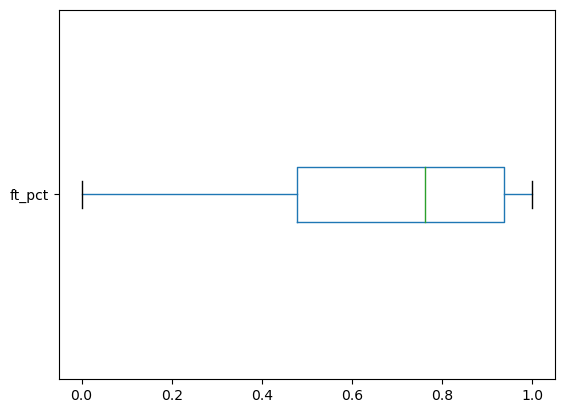

In [47]:
college_completion_data_1h.boxplot(column= 'ft_pct', vert= False, grid=False)
college_completion_data_1h.ft_pct.describe()

In [70]:
college_completion_data_1h['ft_pct_f'] = pd.cut(college_completion_data_1h.ft_pct, bins = [-1,0.76,1], labels =[0,1])
#If we want two segments we input three numbers, start, cut and stop values

college_completion_data_1h

,index,unitid,basic,hbcu,flagship,lat_y,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,...,site_www1.umn.edu/twincities/index.php,site_www2.astate.edu,site_www2.cortland.edu,site_www2.honolulu.hawaii.edu,site_www2.kutztown.edu/,site_www3.sunysuffolk.edu,site_www4.esu.edu/,site_yc.yccd.edu,site_yeshivaofnitra.org,ft_pct_f
0,0.000000,0.000000,True,True,True,0.292177,0.023677,0.099927,0.275132,0.306748,...,0,0,0,0,0,0,0,0,0,1
1,0.000263,0.000024,True,True,True,0.267361,0.067476,0.148796,0.275132,0.306748,...,0,0,0,0,0,0,0,0,0,0
2,0.000527,0.000096,True,True,True,0.245286,0.001758,0.214442,0.257496,0.368098,...,0,0,0,0,0,0,0,0,0,0
3,0.000790,0.000139,True,True,True,0.291004,0.033347,0.148796,0.275132,0.306748,...,0,0,0,0,0,0,0,0,0,0
4,0.001053,0.000187,True,True,True,0.245319,0.031348,0.080963,0.275132,0.306748,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3793,0.998947,0.963263,True,True,True,0.297512,0.000511,0.187454,0.320988,0.368098,...,0,0,0,0,0,0,0,0,0,0
3794,0.999210,0.965468,True,True,True,0.259974,0.000688,0.117433,0.338624,0.368098,...,0,0,0,0,0,0,0,0,0,1
3795,0.999473,0.977658,True,True,True,0.368084,0.002733,0.398249,0.507937,0.496933,...,0,0,0,0,0,0,0,0,0,0
3796,0.999737,0.998906,True,True,True,0.487486,0.000729,0.235594,0.613757,1.000000,...,0,0,0,0,0,0,0,0,0,0


In [71]:
#So now let's check the prevalence 
prevalence = college_completion_data_1h.ft_pct_f.value_counts()[1]/len(college_completion_data_1h.ft_pct_f)
#value_count()[1] pulls the count of '1' values in the column (values above .43)

prevalence #gives percent of values above .43 which is equivalent to the prevalence or our baseline

0.5

In [73]:
#let's just double check this
print(college_completion_data_1h.ft_pct_f.value_counts())
1899/(1899+1895)
 #looks good!

1    1899
0    1895
Name: ft_pct_f, dtype: int64


0.5005271481286241